In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
data=np.genfromtxt("MultipleLR.csv",delimiter=",")
x1=data[:,0]
x0=np.ones((len(data[:,0]),1))
x3=np.zeros((len(data[:,0]),1))
for i in range(10):
    x3[i]=1
y=data[:,3]
y=y.reshape(-1,1)
x = np.column_stack((x0,x3,data[:,0:3]))
print(x)
print(y)



[[  1.   1.  73.  80.  75.]
 [  1.   1.  93.  88.  93.]
 [  1.   1.  89.  91.  90.]
 [  1.   1.  96.  98. 100.]
 [  1.   1.  73.  66.  70.]
 [  1.   1.  53.  46.  55.]
 [  1.   1.  69.  74.  77.]
 [  1.   1.  47.  56.  60.]
 [  1.   1.  87.  79.  90.]
 [  1.   1.  79.  70.  88.]
 [  1.   0.  69.  70.  73.]
 [  1.   0.  70.  65.  74.]
 [  1.   0.  93.  95.  91.]
 [  1.   0.  79.  80.  73.]
 [  1.   0.  70.  73.  78.]
 [  1.   0.  93.  89.  96.]
 [  1.   0.  78.  75.  68.]
 [  1.   0.  81.  90.  93.]
 [  1.   0.  88.  92.  86.]
 [  1.   0.  78.  83.  77.]
 [  1.   0.  82.  86.  90.]
 [  1.   0.  86.  82.  89.]
 [  1.   0.  78.  83.  85.]
 [  1.   0.  76.  83.  71.]
 [  1.   0.  96.  93.  95.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [398]:
##### batch GD #####
def GD(x,y,theta,alpha,max_iterations):
    h_theta= x @ theta
    m=len(y)
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        lossfunc=(1/(2*m))*(np.sum((h_theta-y)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta-y
        gradient_theta=(1/m)*(x.T @ z)
        theta-=alpha*gradient_theta
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1
    return h_theta,theta,loss_array,epochs,theta0,iterations

In [422]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00006
max_iterations=500
h,theta,loss_array,epochs,theta0,iterations=GD(x,y,theta,alpha,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 97.88655491182769 %
theta [[0.00825707]
 [0.00319622]
 [0.66581178]
 [0.66934381]
 [0.68812573]]
iterations 3


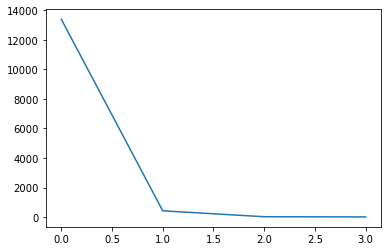

In [423]:
plt.plot(epochs,loss_array)
plt.show()

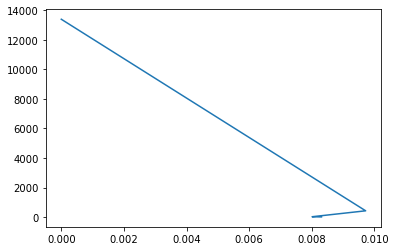

In [424]:
plt.plot(theta0,loss_array)
plt.show()

In [450]:
##### momentum batch GD #####
def MGD(x,y,theta,alpha,gama,max_iterations):
    h_theta= x @ theta
    v=np.zeros((len(x[0,:]),1))
    m=len(y)
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        lossfunc=(1/(2*m))*(np.sum((h_theta-y)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta-y
        gradient_theta=(1/m)*(x.T @ z)
        v=gama*v+alpha*gradient_theta
        theta-=v
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.00001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.00001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.00001:
                break
        iterations+=1
    return h_theta,theta,loss_array,epochs,theta0,iterations

In [451]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00001
max_iterations=500
gama=0.9
h,theta,loss_array,epochs,theta0,iterations=MGD(x,y,theta,alpha,gama,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 93.29508738512935 %
theta [[0.00841948]
 [0.00368416]
 [0.66705611]
 [0.6684275 ]
 [0.75237093]]
iterations 62


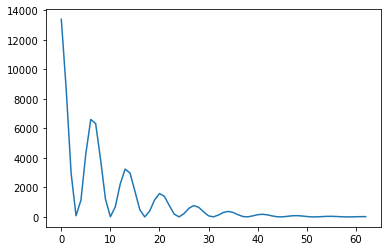

In [452]:
plt.plot(epochs,loss_array)
plt.show()

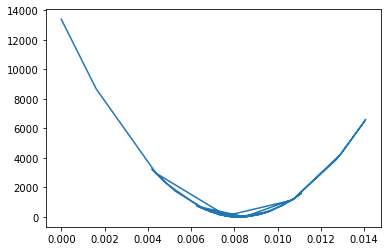

In [453]:
plt.plot(theta0,loss_array)
plt.show()

In [454]:
##### Nesterov ####

def Nesterov_GD(x,y,theta,alpha,gama,max_iterations):
    h_theta= x @ theta
    v=np.zeros((len(x[0,:]),1))
    m=len(y)
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        lossfunc=(1/(2*m))*(np.sum((h_theta-y)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        theta_temp=theta - gama*v
        h_theta=x @ theta_temp
        z=h_theta-y
        gradient_theta_temp=(1/m)*(x.T @ z)
        theta=theta_temp-alpha*gradient_theta_temp
        v=gama*v+alpha*gradient_theta_temp
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta_temp])<0.00001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.00001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.00001:
                break
        iterations+=1
    return h_theta,theta,loss_array,epochs,theta0,iterations

In [455]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00001
max_iterations=500
gama=0.9
h,theta,loss_array,epochs,theta0,iterations=Nesterov_GD(x,y,theta,alpha,gama,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 97.92299016481405 %
theta [[0.00824818]
 [0.00341062]
 [0.65920293]
 [0.66152398]
 [0.71099562]]
iterations 34


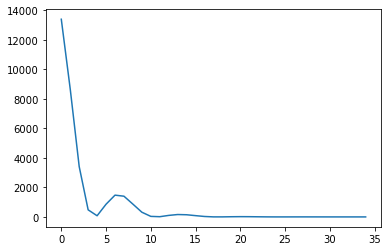

In [456]:
plt.plot(epochs,loss_array)
plt.show()

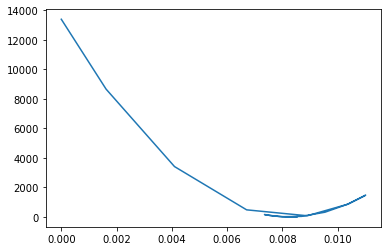

In [457]:
plt.plot(theta0,loss_array)
plt.show()

In [470]:
#### adagrad GD ####
def adagrad_GD(x_1,y,theta,alpha,epthlon,max_iterations):
    v=np.zeros((len(x[0,:]),1))
    m=len(y)
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        h_theta= x @ theta 
        lossfunc=(1/(2*m))*(np.sum((h_theta-y)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta-y
        gradient_theta=(1/m)*(x.T @ z)
        v=v+gradient_theta**2
        theta-=(alpha/(np.sqrt(v)+epthlon))*gradient_theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break 
        iterations+=1
    return h_theta,iterations,theta0,loss_array,epochs

In [471]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.2
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=500
h,iterations,theta0,loss_array,epochs=adagrad_GD(x,y,theta,alpha,epthlon,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 97.72686291226182 %
iterations 23


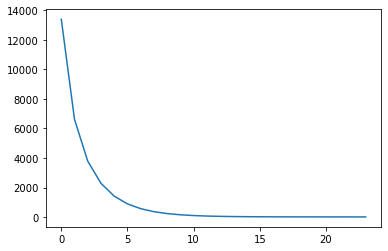

In [460]:
plt.plot(epochs,loss_array)
plt.show()

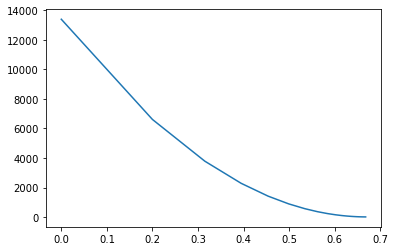

In [461]:
plt.plot(theta0,loss_array)
plt.show()

In [466]:
#### RMSprop GD ####
def RMSprop_GD(x_1,y,theta,alpha,beta,epthlon,max_iterations):
    h_theta= x @ theta
    v=np.zeros((len(x[0,:]),1))
    m=len(y)
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        lossfunc=(1/(2*m))*(np.sum((h_theta-y)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta-y
        gradient_theta=(1/m)*(x.T @ z)
        v=beta*v+(1-beta)*(gradient_theta**2)
        theta-=(alpha/(np.sqrt(v)+epthlon))*gradient_theta
        h_theta= x @ theta 
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break 
        iterations+=1
    return h_theta,iterations,theta0,theta1,loss_array,epochs

In [467]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.2
beta=0.9
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=10000
h,iterations,theta0,theta1,loss_array,epochs=RMSprop_GD(x,y,theta,alpha,beta,epthlon,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 97.8282605613833 %
iterations 3


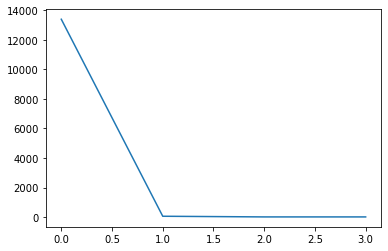

In [464]:
plt.plot(epochs,loss_array)
plt.show()

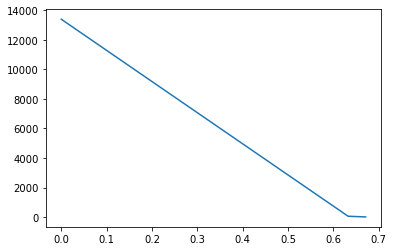

In [465]:
plt.plot(theta0,loss_array)
plt.show()

In [394]:
#### adam GD ####
def adam_GD(x_1,y,theta,alpha,beta,gama,epthlon,max_iterations):
    h_theta= x @ theta
    size=len(y)
    th=[]
    theta1=[]
    theta0=[]
    loss_array=[]
    epochs=[]
    iterations=0
    lossfunc=(1/(2*size))*(np.sum((h_theta-y)**2))
    theta0.append(float((theta[0])))
    theta1.append(float((theta[1])))
    loss_array.append(lossfunc)
    epochs.append(iterations)
    iterations+=1
    v=np.zeros((len(x[0,:]),1))
    m=np.zeros((len(x[0,:]),1))
    for i in range(max_iterations):
        z=h_theta-y
        gradient_theta=(1/size)*(x.T @ z)
        v=beta*v+(1-beta)*gradient_theta**2
        v=v/(1-(beta**(iterations)))
        m=gama*m+(1-gama)*gradient_theta
        m=m/(1-(gama**iterations))
        theta-=(alpha/(np.sqrt(v)+epthlon))*m
        h_theta= x @ theta
        lossfunc=(1/(2*size))*(np.sum((h_theta-y)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break 
        iterations+=1
    return h_theta,iterations,theta0,loss_array,epochs

In [395]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.5
beta=0.95
gama=0.5
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=1000
h,iterations,theta0,loss_array,epochs=adam_GD(x,y,theta,alpha,beta,gama,epthlon,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)


accuracy= 97.65445706632919 %
iterations 6


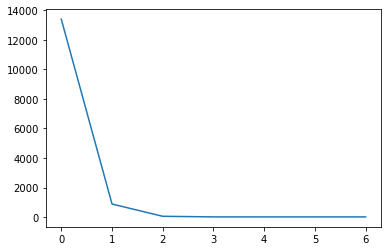

In [396]:
plt.plot(epochs,loss_array)
plt.show()

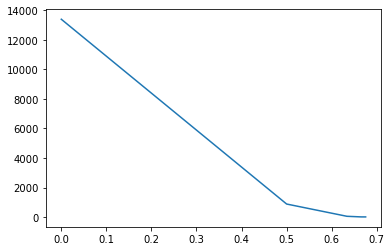

In [397]:
plt.plot(theta0,loss_array)
plt.show()